# Problemas de mezclas

Varios materiales son mezclados en proporciones deseadas para generar un producto final con ciertas características. Ejemplos:

- Mezclar varios tipos de petroleo para generar distintos tipos de gasolina y derivados.
- Mezclar varios tipos de metales para conseguir aleaciones con características específicas.
- Mezclar diferente tipos de comida para proveer la cantidad de nutrientes específicos.

## Objetivo General

Se desea usar programación en python junto con la librería Scipy para resolver un problema de optimización con el método de la programación lineal

## Objetivos específicos
- Definimos variables de decisión.
- Identificar y plantear la función a optimizar, nuestra función objetivo.
- Ubicar las restricciones.
- Crear la matriz de restricciones correspondientes con el formato aceptado por **scipy**.
- Encontrar las cantidades óptimas para la mezclas de combustible.

## Problema de gasolina

Una compañía petrolera hace dos mezclas de combustibles mezclando 3 tipos de petroleo. Cada uno tiene un costo específico por litro y una cantidad máxima disponible.

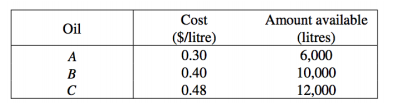

Además, cada mezcla de combustible tiene ciertas especificaciones de contenido en cuanto a los tipos de petroleo usado.

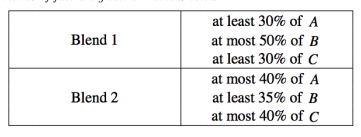

Cada litro de la mezcla 1 se puede vender por $\$$1.10 y cada litro de la mezcla 2 se vende en $\$$1.2.

También, los contratos requieren que se produzca una cantidad de 10,000 litros de cada tipo de mezcla.

En este caso nuestras variables serian:

$x_1$ = Cantidad de A usado en la mezcla 1

$x_2$ = Cantidad de B usado en la mezcla 1

$x_3$ = Cantidad de C usado en la mezcla 1

$x_4$ = Cantidad de A usado en la mezcla 2

$x_5$ = Cantidad de B usado en la mezcla 2

$x_6$ = Cantidad de C usado en la mezcla 2

**Función a optimizar Ganancia con el producto (Precio de venta - precio de producción):**

Precio de Venta:
$$ 1.1(x_1+x_2+x_3)+1.2(x_4+x_5+x_6)$$

Costo de produccion:
$$ .3(x_1+x_4)+.4(x_2+x_5)+.48(x_3+x_6)$$

**Requerimientos de produccion**

$$ x_1+x_2+x_3 >= 10000$$
$$ x_4+x_5+x_6 >= 10000$$
Se necesitará que se cambien a menor o igual que

**Restricciones de disponibilidad**

$$ x_1+x_4 <= 6000$$
$$ x_2+x_5<=10000$$
$$ x_3+x_6<=12000$$

**Restricciones de composicion**

$$x_1/(x_1+x_2+x_3) >= .3 $$
$$x_2/(x_1+x_2+x_3) <= .5 $$
$$x_3/(x_1+x_2+x_3) >= .3 $$

$$x_4/(x_4+x_5+x_6) <= .4 $$
$$x_5/(x_4+x_5+x_6) >= .35 $$
$$x_5/(x_4+x_5+x_6) <= .4 $$

**Estas restricciones se transforman a: 
 $$-.7x_1+.3x_2+.3x_3<=0$$
 $$ -.5x_1+.5x_2-.5x_3 <= 0$$
 $$ .3x_1+.3x_2-.7x_3<=0 $$
 
 $$ .6x_4-.4x_5-.4x_6<=0$$
 $$ .35x_4-.65x_5+.35x_6<=0$$
 $$ -.4x_4+.6x_5-.4x_6<=0$$

In [108]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [109]:
venta=np.array([1.1,1.1,1.1,1.2,1.2,1.2])
costo=np.array([.3,.4,.48,.3,.4,.48])
ganancia=-(venta-costo) # Se pone signo menos porque se quiere maximizar

In [110]:
A=[[-1,-1,-1,0,0,0], # Requerimientos de producción, signo negativo porque la condición debe ser <=
  [0,0,0,-1,-1,-1], # Requerimientos de producción, signo negativo porque la condición debe ser <=
  [1,0,0,1,0,0], # Restricciones de disponibilidad
  [0,1,0,0,1,0], # Restricciones de disponibilidad
  [0,0,1,0,0,1], # Restricciones de disponibilidad
  [-.7,.3,.3,0,0,0], #Restricciones de composición mezcla 1
  [-.5,.5,-.5,0,0,0], #Restricciones de composición mezcla 1
  [.3,.3,-.7,0,0,0], #Restricciones de composición mezcla 1
  [0,0,0,.6,-.4,-.4], #Restricciones de composición mezcla 2
  [0,0,0,.35,-.65,.35],#Restricciones de composición mezcla 2
  [0,0,0,-.4,-.4,.6]] #Restricciones de composición mezcla 2

b=[-10000,-10000,6000,10000,12000,0,0,0,0,0,0] #vector de restricciones

In [111]:
nombres=["A en mezcla 1","B en mezcla 1","C en mezcla 1","A en mezcla 2","B en mezcla 2","C en mezcla 2","Utilidad"]

In [112]:
res = linprog(c=ganancia,A_ub=A,b_ub=b,method="interior-point")
print(res)

     con: array([], dtype=float64)
     fun: -21039.99958403811
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([1.33434685e-04, 7.99999935e+03, 9.87856338e-05, 1.85452638e-04,
       2.29651723e-04, 6.15522990e+02, 4.63066867e+03, 3.01514567e+03,
       4.81552287e+03, 3.33066865e+03, 1.21514568e+03])
  status: 0
 success: True
       x: array([3615.52302958,  369.33139377, 6015.14571009, 2384.47687163,
       9630.66842078, 5984.85406026])


In [113]:
for i,j in enumerate(nombres[:-1]):
    print("La cantidad optima de {} es: {} litros".format(j,res.x[i]))

La cantidad optima de A en mezcla 1 es: 3615.523029579676 litros
La cantidad optima de B en mezcla 1 es: 369.331393765694 litros
La cantidad optima de C en mezcla 1 es: 6015.145710089315 litros
La cantidad optima de A en mezcla 2 es: 2384.4768716346903 litros
La cantidad optima de B en mezcla 2 es: 9630.668420781667 litros
La cantidad optima de C en mezcla 2 es: 5984.854060258963 litros


In [114]:
print("La ganancia total obtenida es : {} dolares".format(-res.fun))

La ganancia total obtenida es : 21039.99958403811 dolares


Con la resolución de este modelo pudimos determinar la cantidad de litros que se tienen que usar de cada tipo de petróleo para la producción de combustibles y generar la mayor ganancia posible. Usando esta información la empresa puede tomar desiciones inteligentes que la beneficien mas.

**En la siguiente tabla se muestran resumidos los valores encontrados y se verifica que efectivamente se cumplieron con todas las restricciones establecidas**
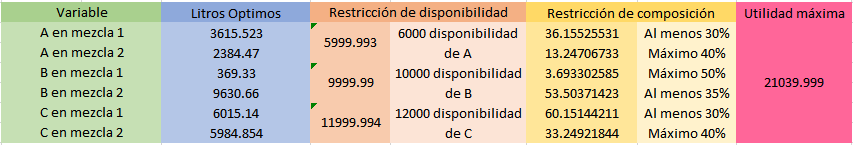

In [115]:
A=np.array(A)
b=np.array(b)
x=np.random.uniform(0,12000,6)

**Se generan 10 opciones aleatorias que cumplan con todas las restricciones**

In [116]:
opciones=[]
for i in range(10):    
    z=1
    while z!=0:
        x=np.random.uniform(0,12000,6)
        z=0
        for i,j in enumerate(np.dot(A,x)):
            if j>b[i]:
                z=1
    opciones.append(x)

**Definimos función utilidad**

In [117]:
def utilidad(x):
    return -np.dot(ganancia,x)

**Calculamos Utilidades**

In [118]:
utilidades=[]
for i in opciones:
    utilidades.append(utilidad(i))
utilidades.append(-res.fun)
utilidades=np.array(utilidades)
utilidades

array([17851.43236033, 16701.4853231 , 19418.24879663, 17293.33434884,
       15916.91197773, 16049.55133711, 16512.77228205, 18962.4243516 ,
       18265.41354421, 19533.9894114 , 21039.99958404])

**Generamos tabla con valores**

In [119]:
opciones.append(res.x)
opciones=np.array(opciones)
datos=np.append(opciones,[[i] for i in utilidades],axis=1)

In [120]:
final={b:datos[:,a] for a,b in enumerate(nombres)}
final=pd.DataFrame(final)
final.head()

,A en mezcla 1,B en mezcla 1,C en mezcla 1,A en mezcla 2,B en mezcla 2,C en mezcla 2,Utilidad
0,3920.581950,644.594451,6491.101890,2054.013734,6194.386529,4771.036011,17851.432360
1,3829.851368,1952.966819,6354.149792,1407.920581,6337.252897,2769.477421,16701.485323
2,5093.353331,197.503085,11321.957847,750.846811,9139.066035,275.951595,19418.248797
3,4027.147157,2918.546311,3414.538670,1851.151728,6826.047014,3867.702865,17293.334349
4,5072.383637,448.301687,5762.651669,783.118628,6508.514818,2862.126712,15916.911978


**Graficamos las utilidades**

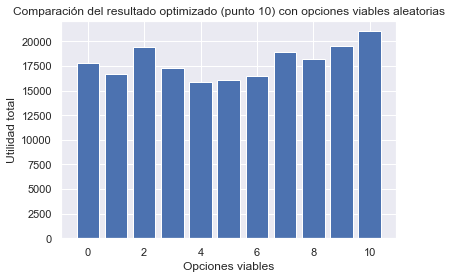

In [121]:
plt.bar(list(range(11)),final.Utilidad)
plt.title("Comparación del resultado optimizado (punto 10) con opciones viables aleatorias")
plt.xlabel("Opciones viables")
plt.ylabel("Utilidad total");

**Se pudieron generar 10 opciones viables que cumplen con las restricciones del problema, como podemos ver la que tiene la utilidad mas alta es la opción 10 correspondiente al resultado de la optimización, con esto comprobamos que efectivamente el proceso se completó satisfactoriamente**